In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
flight_data = pd.read_csv('flights.csv')
flight_data

,DayofMonth,DayOfWeek,Carrier,OriginAirportID,DestAirportID,DepDelay,ArrDelay
0,19,5,DL,11433,13303,-3,1
1,19,5,DL,14869,12478,0,-8
2,19,5,DL,14057,14869,-4,-15
3,19,5,DL,15016,11433,28,24
4,19,5,DL,11193,12892,-6,-11
...,...,...,...,...,...,...,...
2702213,19,6,DL,13204,14869,1,-3
2702214,19,6,DL,10397,13495,-2,-3
2702215,19,6,DL,10140,10397,18,9
2702216,19,6,DL,10397,13244,10,7


In [3]:
flight_data.isnull().sum()

DayofMonth         0
DayOfWeek          0
Carrier            0
OriginAirportID    0
DestAirportID      0
DepDelay           0
ArrDelay           0
dtype: int64

In [4]:
flight_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2702218 entries, 0 to 2702217
Data columns (total 7 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   DayofMonth       int64 
 1   DayOfWeek        int64 
 2   Carrier          object
 3   OriginAirportID  int64 
 4   DestAirportID    int64 
 5   DepDelay         int64 
 6   ArrDelay         int64 
dtypes: int64(6), object(1)
memory usage: 144.3+ MB


# Distribution of departure and arrival delays

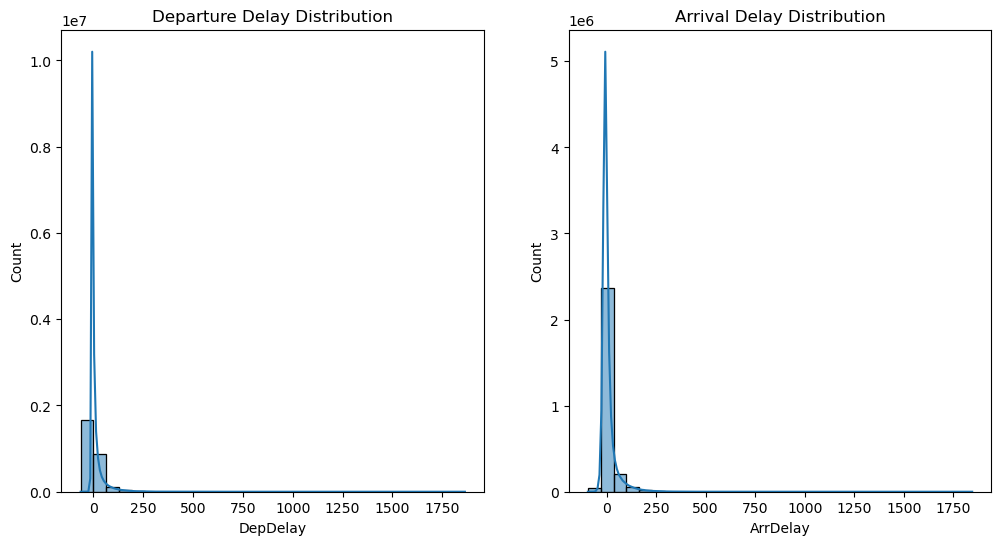

In [5]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(flight_data['DepDelay'], bins=30, kde=True)
plt.title('Departure Delay Distribution')

plt.subplot(1, 2, 2)
sns.histplot(flight_data['ArrDelay'], bins=30, kde=True)
plt.title('Arrival Delay Distribution')

plt.show()

# Count of flights for each day of the week

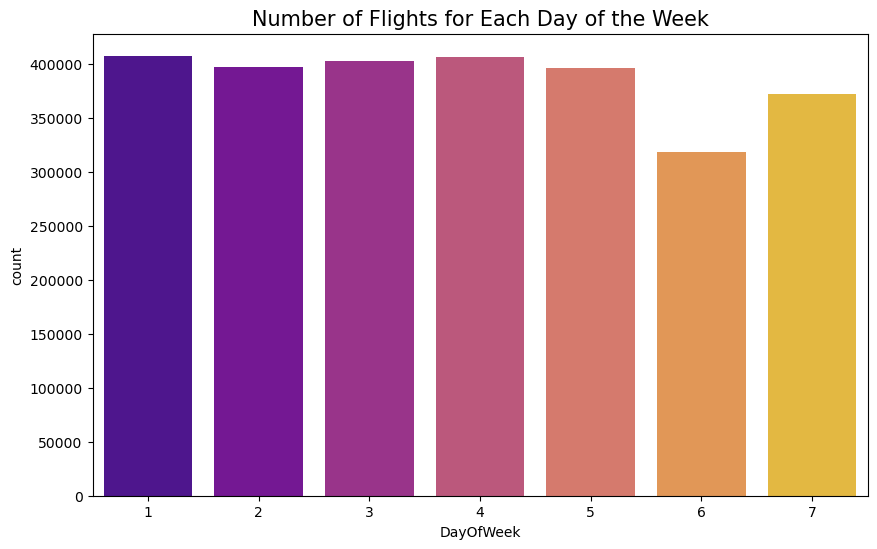

In [6]:
plt.figure(figsize=(10, 6))
sns.countplot(x='DayOfWeek', data=flight_data,palette='plasma')
plt.title('Number of Flights for Each Day of the Week',size=15)
plt.show()

# Count of flights for each carrier

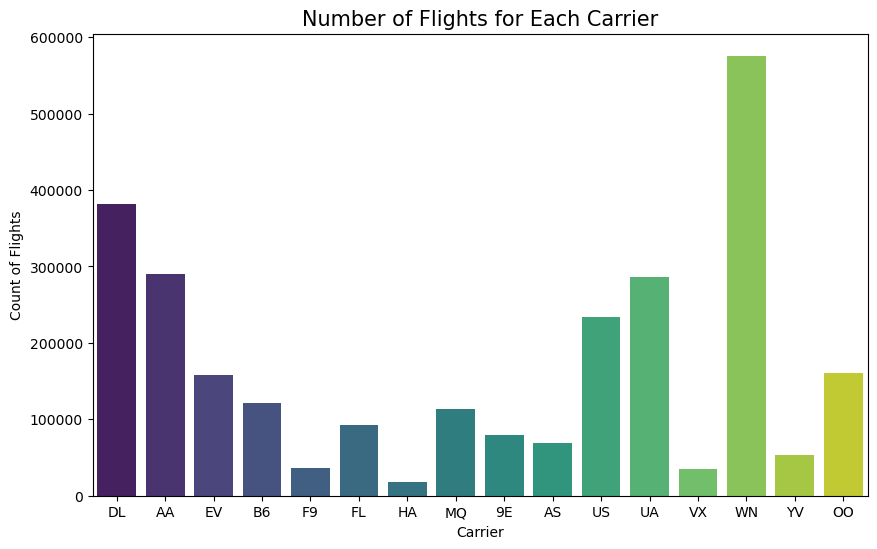

In [7]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Carrier', data=flight_data, palette='viridis')
plt.title('Number of Flights for Each Carrier',size=15)
plt.xlabel('Carrier')
plt.ylabel('Count of Flights')
plt.show()

#  Relationship between departure delay and arrival delay.

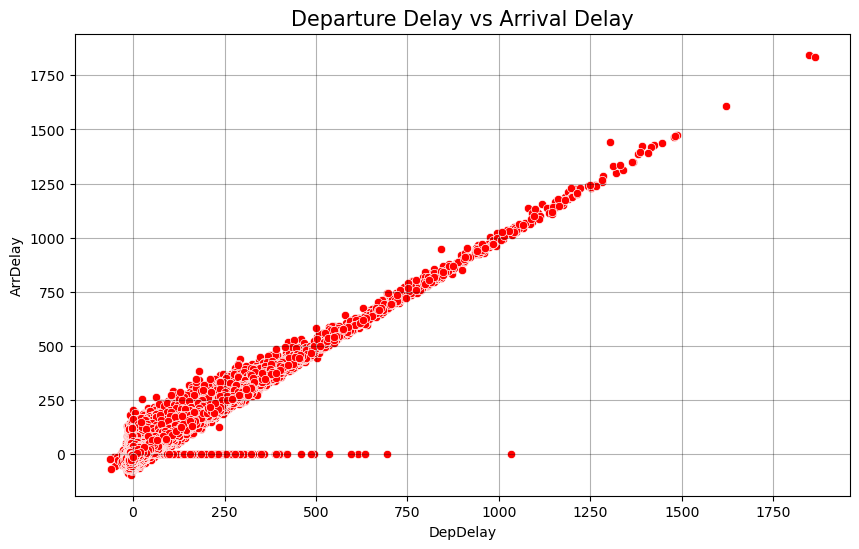

In [8]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='DepDelay', y='ArrDelay', data=flight_data,c='red')
plt.title('Departure Delay vs Arrival Delay',size=15)
plt.grid(alpha=0.3,color='black')
plt.show()

# Average DepDelay over days of the month

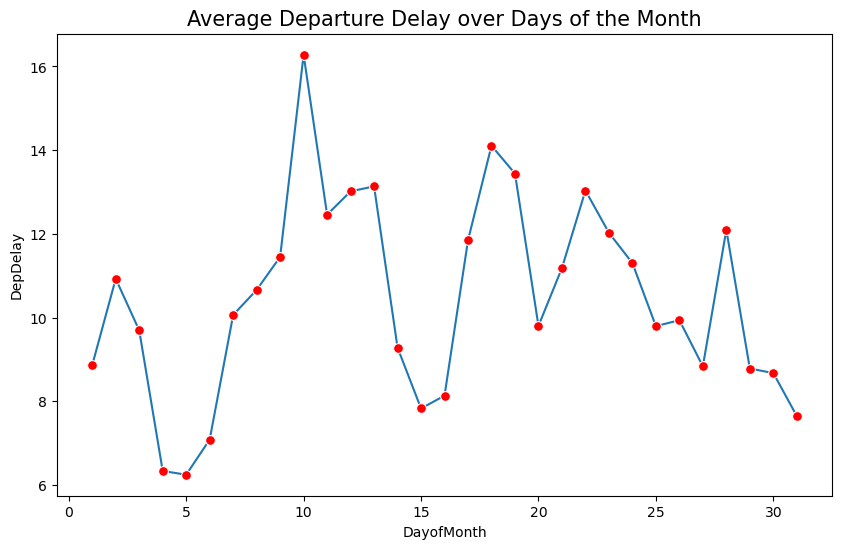

In [9]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='DayofMonth', y='DepDelay', data=flight_data.groupby('DayofMonth')['DepDelay'].mean().reset_index(),marker='o',markersize=7,markerfacecolor='red')
plt.title('Average Departure Delay over Days of the Month',size=15)
plt.show()

# Distribution of departure and arrival delays for each carrier

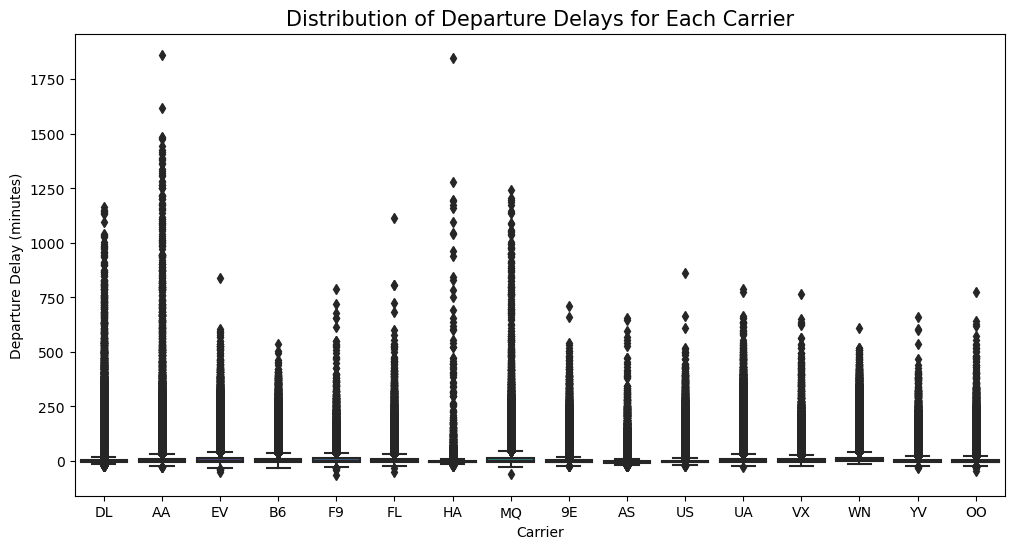

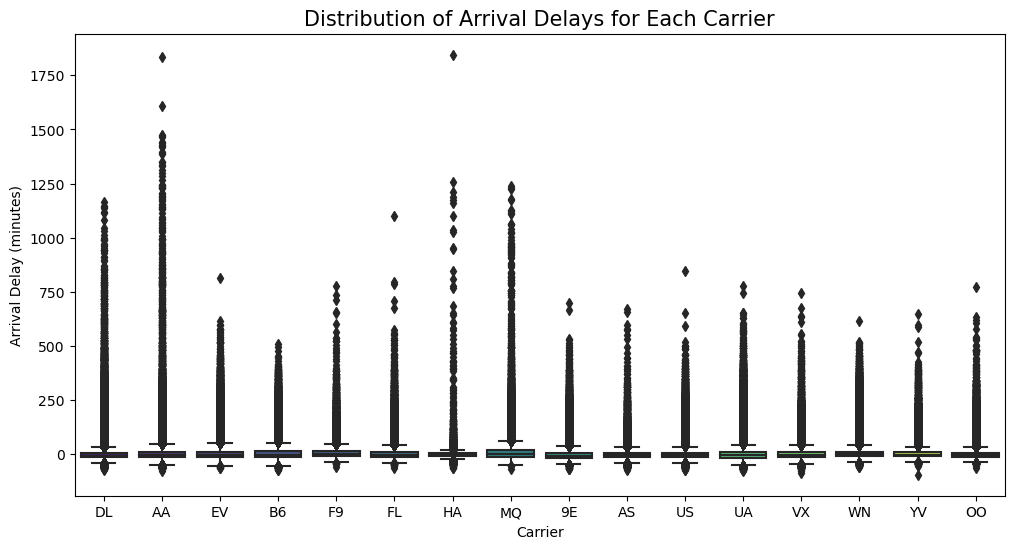

In [10]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Carrier', y='DepDelay', data=flight_data, palette='viridis')
plt.title('Distribution of Departure Delays for Each Carrier',size=15)
plt.xlabel('Carrier')
plt.ylabel('Departure Delay (minutes)')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Carrier', y='ArrDelay', data=flight_data, palette='viridis')
plt.title('Distribution of Arrival Delays for Each Carrier',size=15)
plt.xlabel('Carrier')
plt.ylabel('Arrival Delay (minutes)')
plt.show()

# Correlation matrix between numerical columns

In [11]:
numerical_columns = ['DayofMonth', 'DayOfWeek', 'DepDelay', 'ArrDelay']

numerical_data = flight_data[numerical_columns]

correlation_matrix = numerical_data.corr()

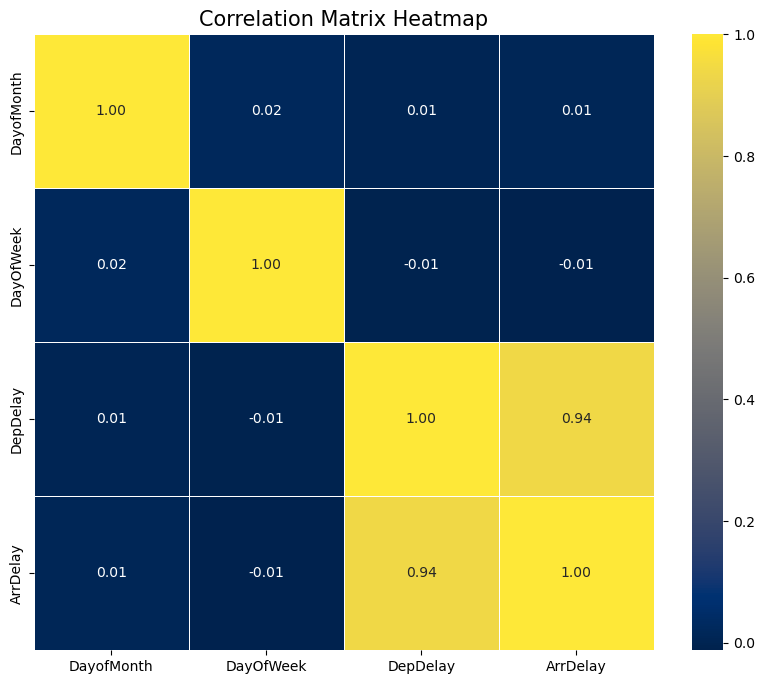

In [12]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='cividis', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap',size=15)
plt.show()